**Based on the PIMA indian historic diabetes datasets build a machine learning binary classification model to predict whether or not a patient has diabetes. The Dataset consist of several medical predicter variable and one target value. predicter value has number of pregnencies patient has had their BMI, insulin, age and so on.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
print(data.isna().sum())
print("shape:", data.shape)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
shape: (768, 9)


Data Preprocessing
EDA (Exploratory Data Analysis)

<function matplotlib.pyplot.show(close=None, block=None)>

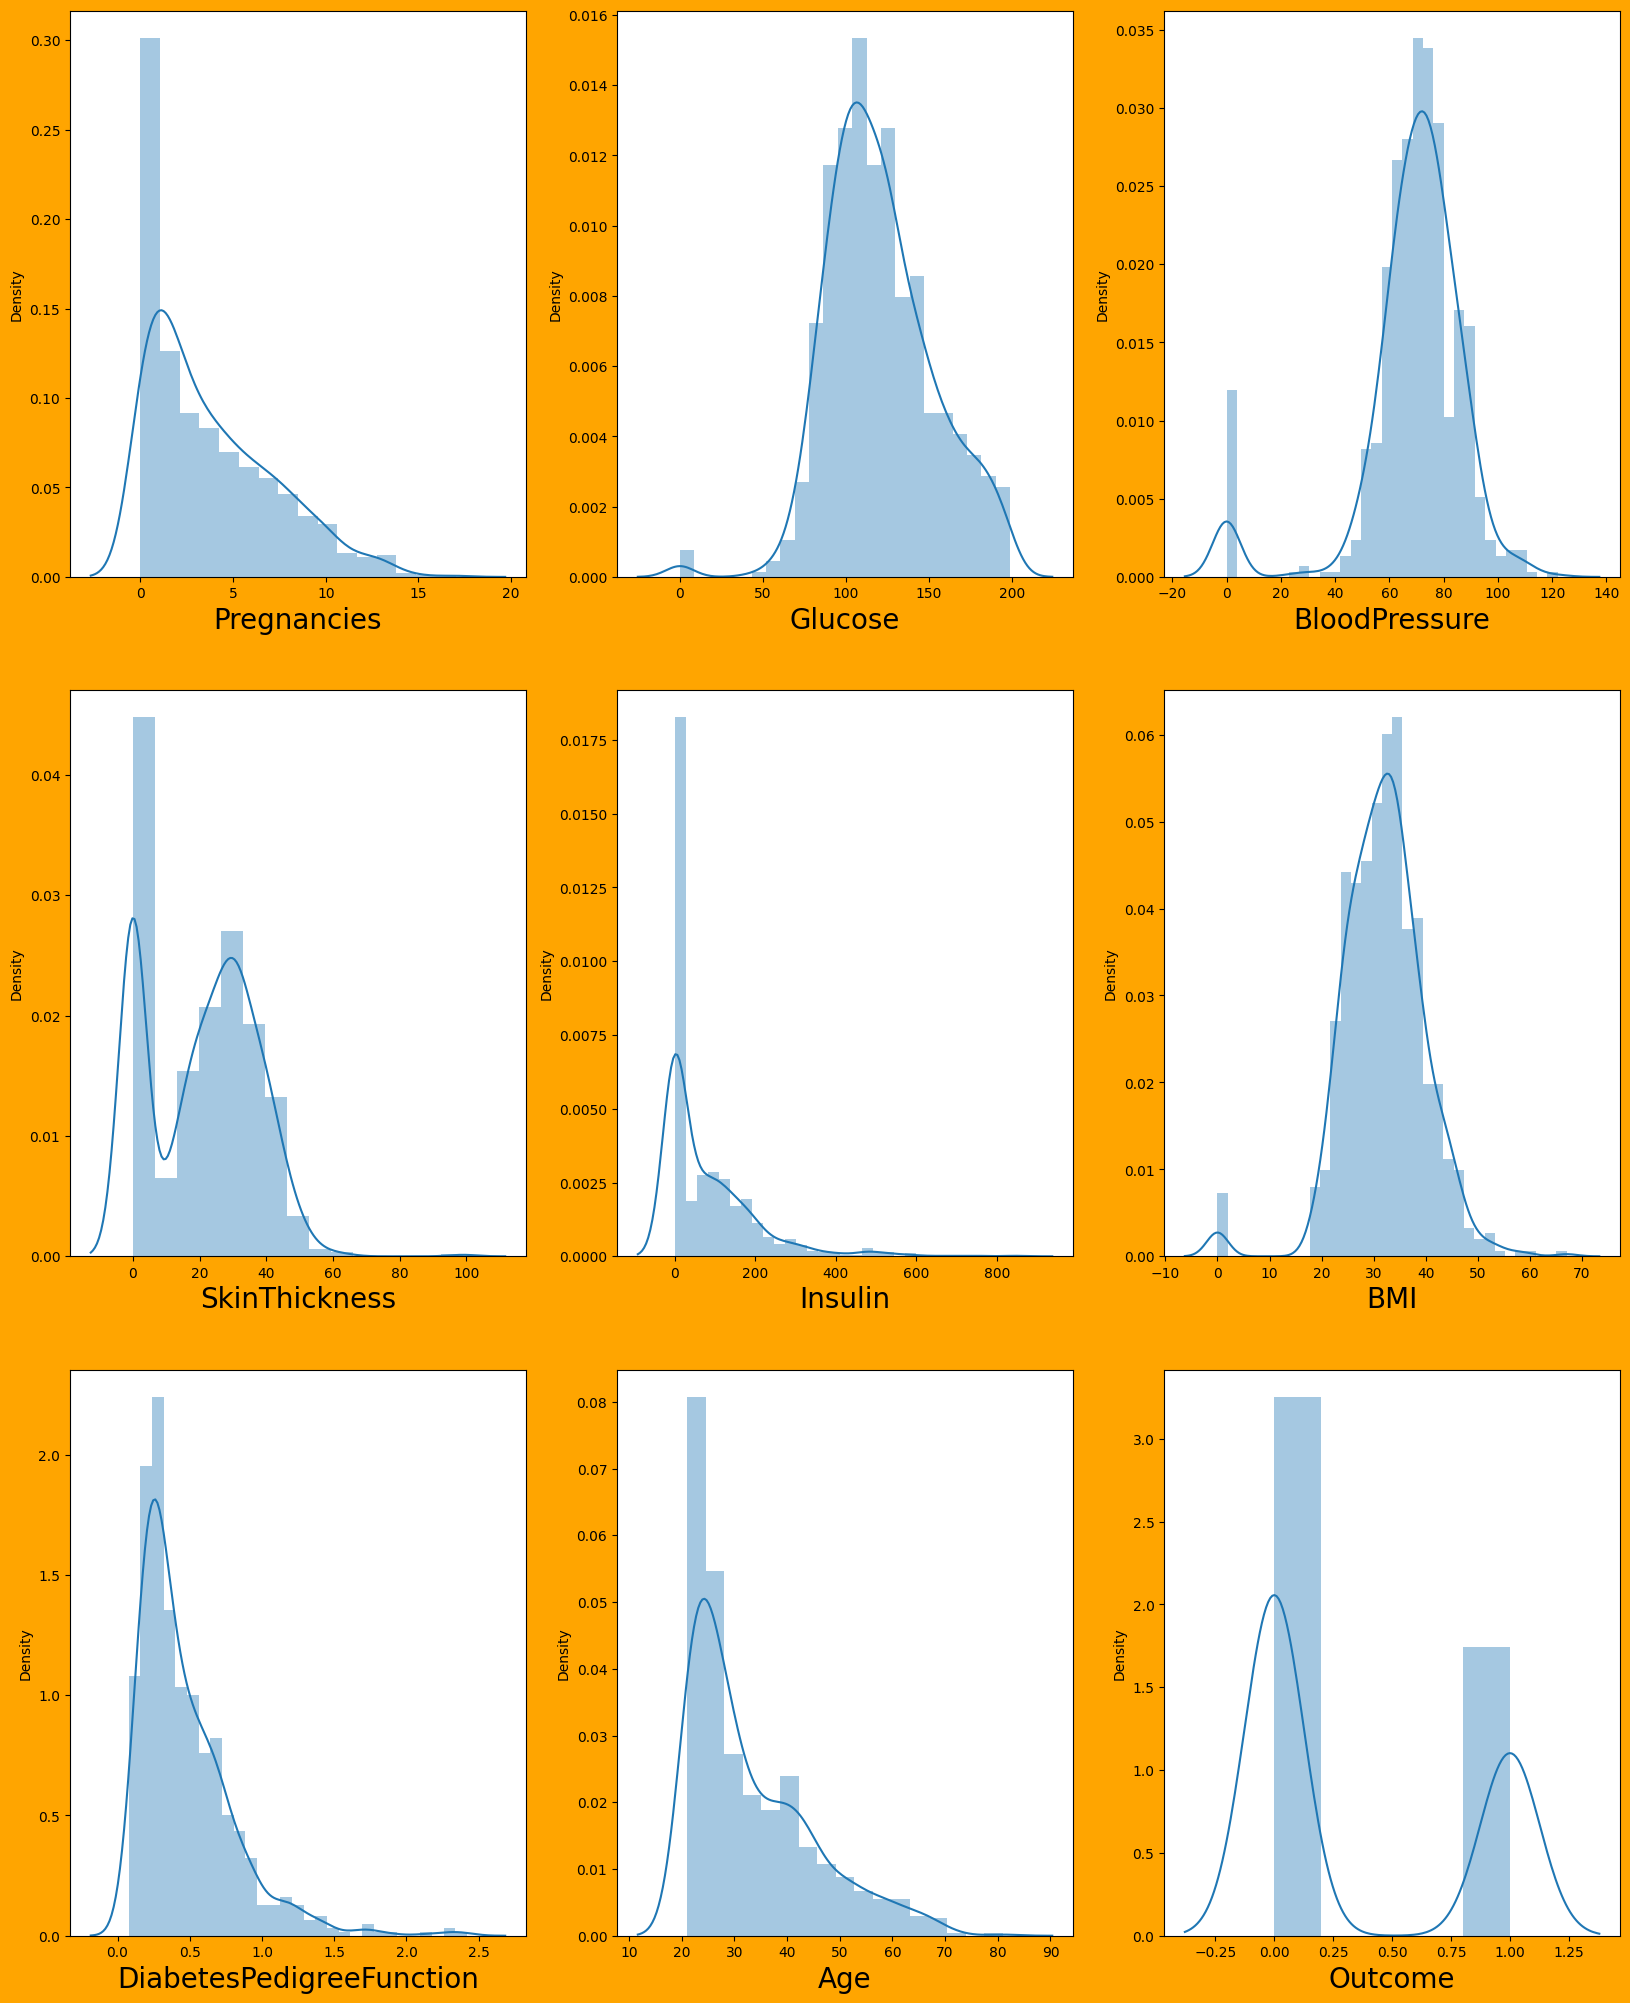

In [6]:
plt.figure(figsize=(20, 25), facecolor='orange')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        plotnumber += 1
plt.show

<h4>Glucose, BMI, SkinThickness, Insulin, Blood Pressure has zero values that cannot be possible, replace it with mean</h4>

In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())

data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


<function matplotlib.pyplot.show(close=None, block=None)>

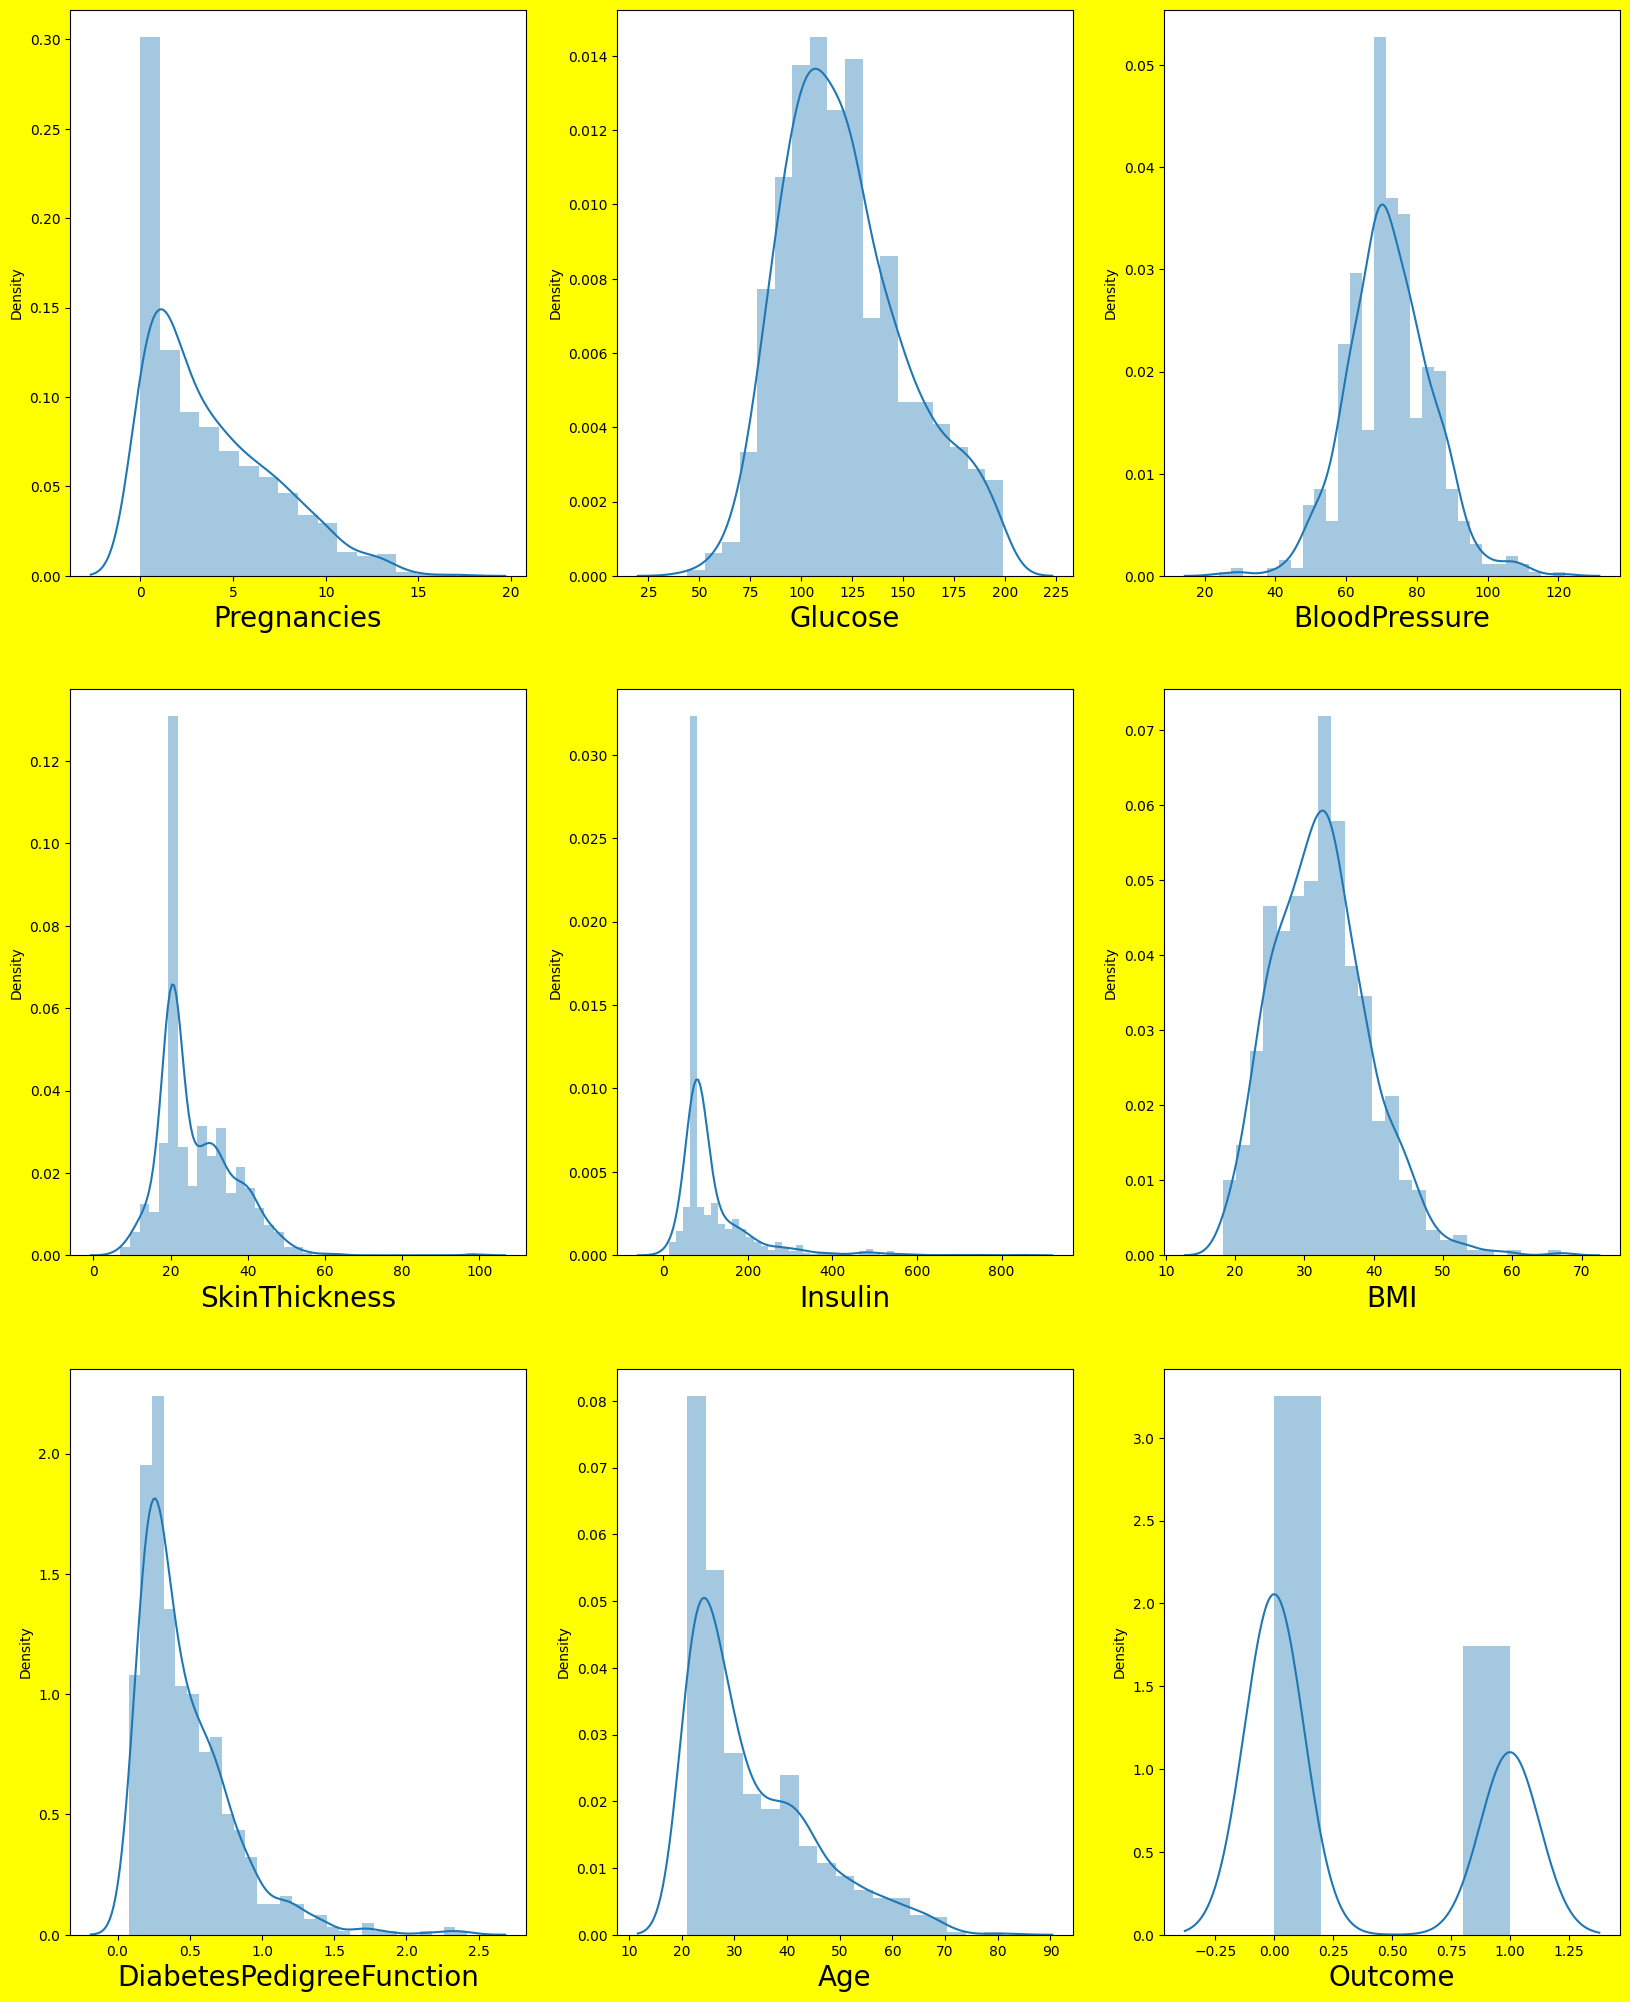

In [9]:
plt.figure(figsize=(20, 25), facecolor='yellow')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        plotnumber += 1
plt.show

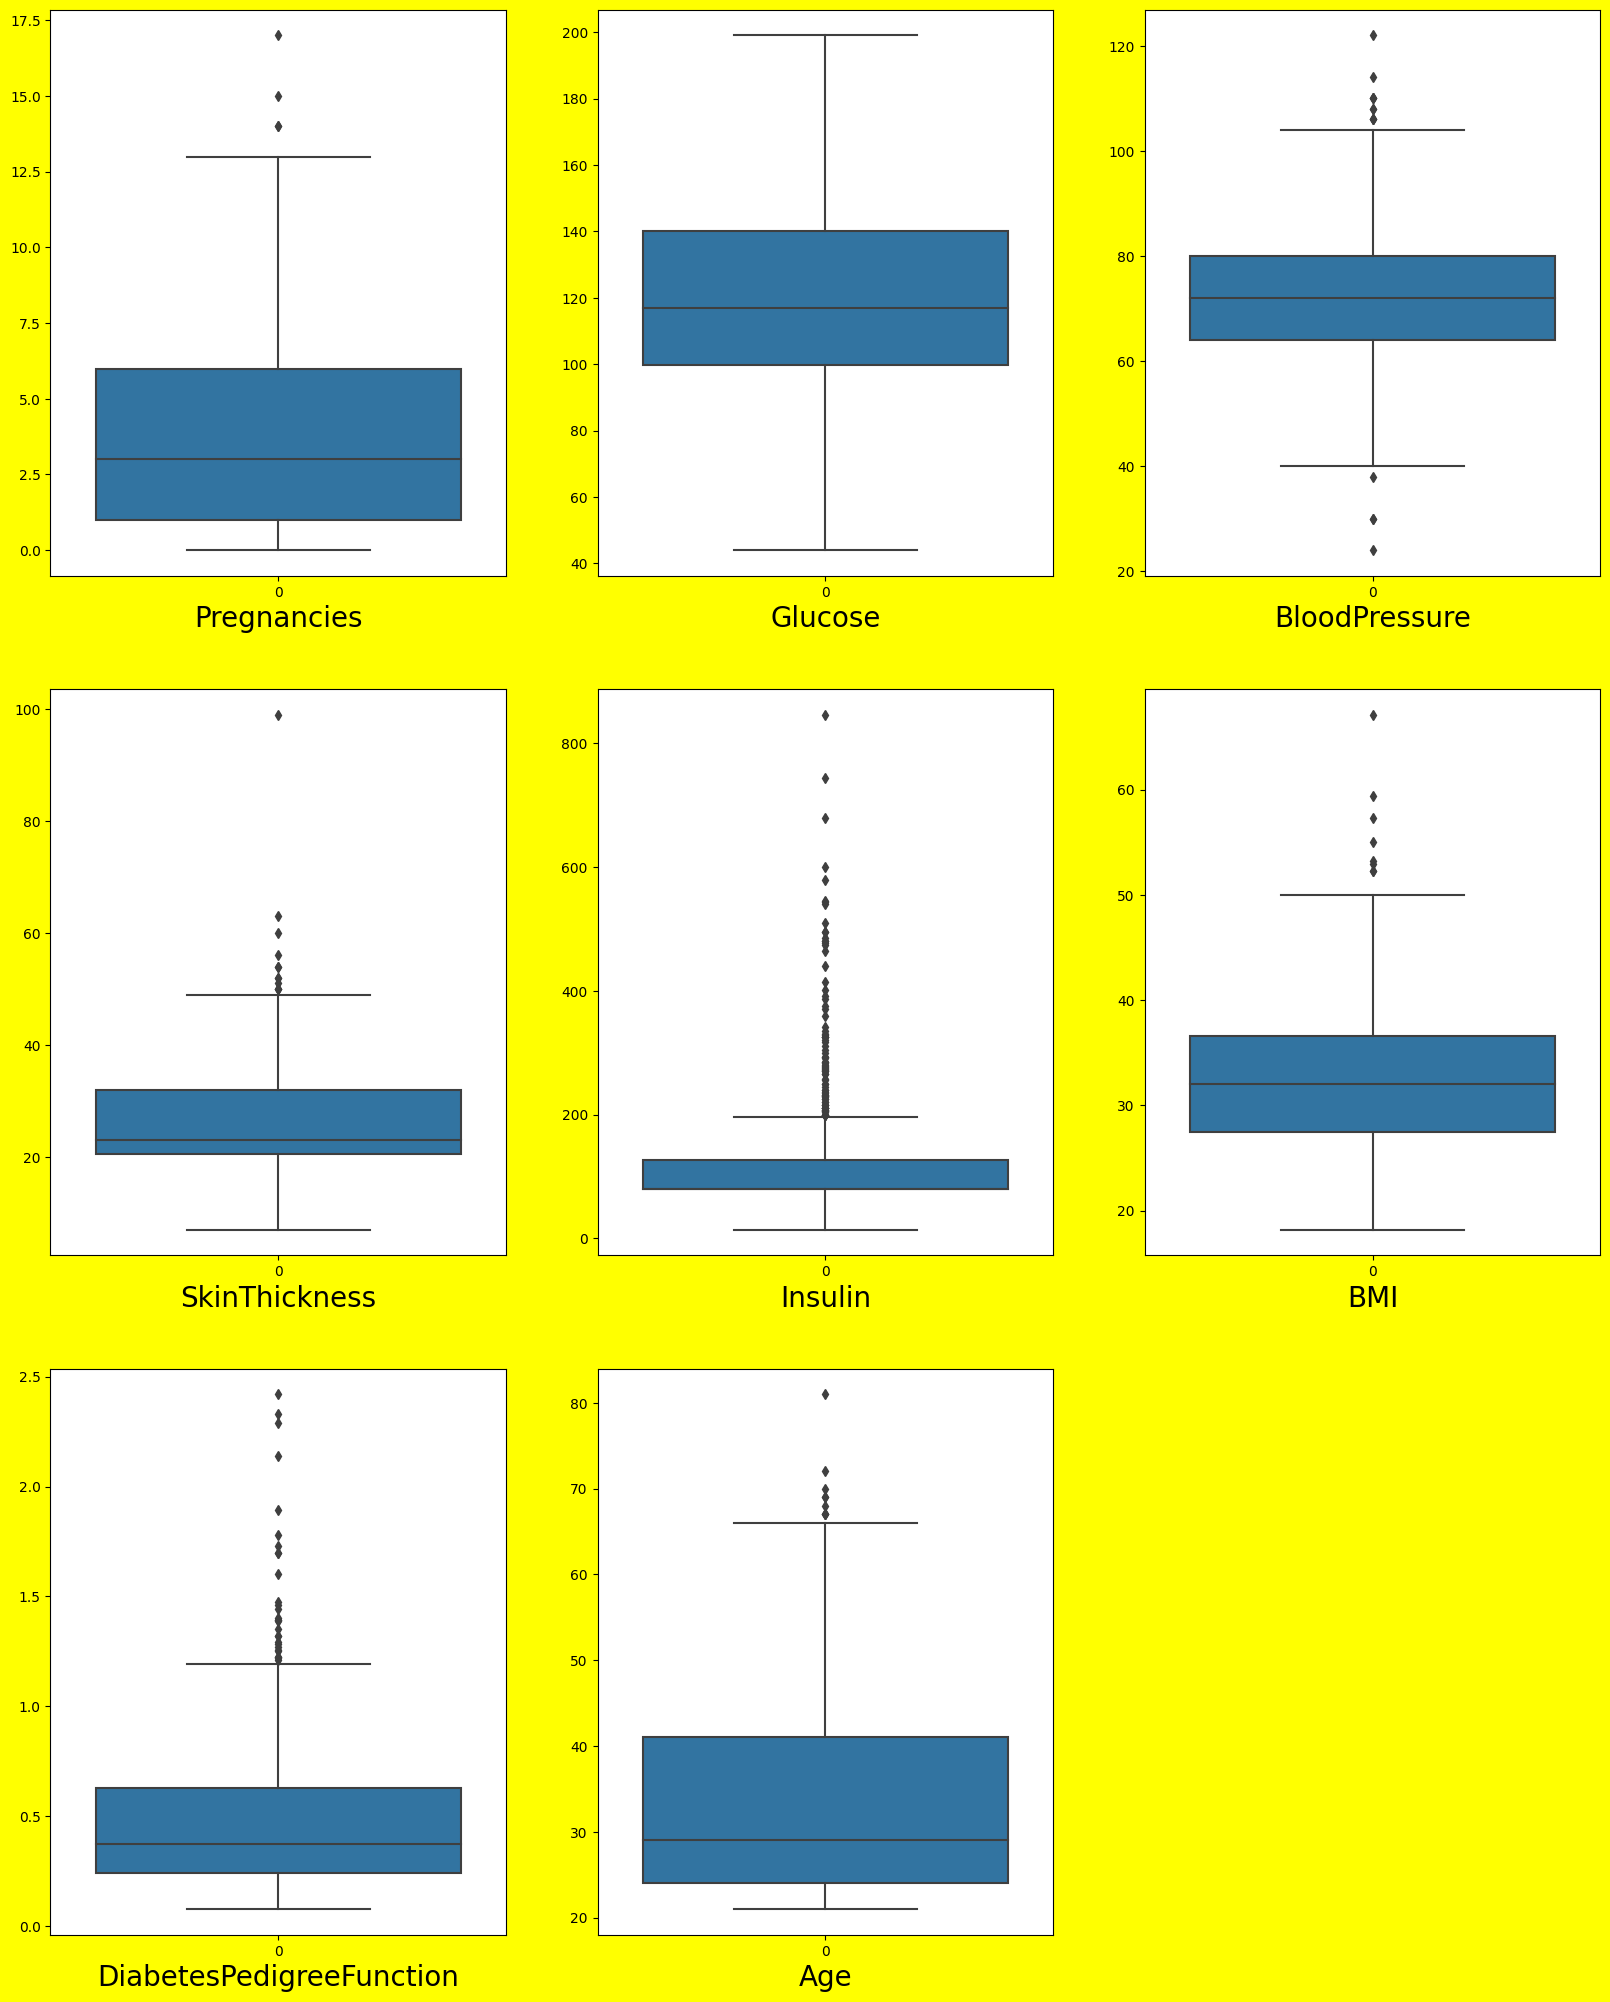

In [10]:

data_features = data.drop("Outcome", axis =1)
plt.figure(figsize=(20,25),facecolor="yellow")
plotnumber = 1
for column in data_features:
    if plotnumber <= 8:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize = 20)
        plotnumber += 1
plt.show()


**Removing outliers in pregnancy data**

In [11]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3 - q1
preg_high = (q3.Pregnancies + 1.5 * IQR.Pregnancies)
print("Pregnancies:", preg_high)

Pregnancies: 13.5


In [12]:
index = np.where(data['Pregnancies'] > preg_high)
index

(array([ 88, 159, 298, 455]),)

In [13]:
data = data.drop(data.index[index])
data.shape

(764, 9)

**Removing outliers in SkinThickness data**

In [14]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3 - q1
skin_high = (q3.SkinThickness + 1.5 * IQR.SkinThickness)
print("SkinThickness:", skin_high)

SkinThickness: 49.1953125


In [15]:
index = np.where(data['SkinThickness'] > skin_high)
index

(array([ 57,  86,  98, 119, 149, 209, 271, 273, 442, 528, 575, 587]),)

In [16]:
df = data.drop(data.index[index])
df.shape

(752, 9)

**Removing outliers in Insulin Data**

In [17]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3 - q1
insulin_high = (q3.Insulin + 1.5 * IQR.Insulin)
print("Insulin:", insulin_high)

Insulin: 198.42578125


In [18]:
index = np.where(data['Insulin'] > insulin_high)
index

(array([  8,  13,  16,  20,  31,  39,  43,  53,  54,  56,  73,  94,  98,
        110, 131, 138, 143, 149, 152, 160, 184, 193, 197, 204, 213, 218,
        226, 229, 245, 246, 252, 256, 277, 284, 285, 294, 295, 306, 317,
        332, 356, 357, 361, 367, 372, 385, 389, 392, 406, 409, 412, 421,
        422, 449, 454, 476, 481, 482, 483, 507, 515, 534, 536, 541, 542,
        551, 557, 570, 580, 590, 602, 604, 608, 641, 651, 653, 658, 669,
        675, 681, 691, 696, 703, 706, 709, 711, 717, 744, 749]),)

In [19]:
data = data.drop(data.index[index])
data.shape

(675, 9)

**Removing outliers in Blood Pressure data**

In [20]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3 - q1
blood_high = (q3.BloodPressure + 1.5 * IQR.BloodPressure)
blood_low = (q1.BloodPressure - 1.5 * IQR.BloodPressure)
print("BloodPressure high:", blood_high)
print("BloodPressure low:", blood_low)

BloodPressure high: 104.0
BloodPressure low: 40.0


In [21]:
index = np.where(data['BloodPressure'] > blood_high) and np.where(data['BloodPressure'] < blood_low)
index

(array([ 15, 110, 523, 525]),)

In [22]:
data = data.drop(data.index[index])
data.shape

(671, 9)

**Removing outliers in BMI data**

In [23]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3 - q1
bmi_high = (q3.BMI + 1.5 * IQR.BMI)
print("BMI:", bmi_high)

BMI: 48.525000000000006


In [24]:
index = np.where(data['BMI'] > bmi_high)
index

(array([ 72, 104, 133, 153, 168, 261, 387, 594, 651]),)

In [25]:
df = data.drop(data.index[index])
df.shape

(662, 9)

**Removing outliers in DiabetesPedigreeFunction**

In [26]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3 - q1
dpf_high = (q3.DiabetesPedigreeFunction + 1.5 * IQR.DiabetesPedigreeFunction)
print("DiabetesPedigreeFunction:", dpf_high)

DiabetesPedigreeFunction: 1.1429999999999998


In [27]:
index = np.where(data['DiabetesPedigreeFunction'] > dpf_high)
index

(array([  4,  11,  37,  47,  85, 127, 131, 162, 189, 211, 213, 223, 253,
        266, 286, 322, 333, 355, 387, 428, 467, 513, 518, 537, 540, 541,
        575, 577, 649, 654]),)

In [28]:
data = data.drop(data.index[index])
data.shape

(641, 9)

**Removing outliers in Age**

In [29]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3 - q1
age_high = (q3.Age + 1.5 * IQR.Age)
print("Age:", age_high)

Age: 64.0


In [30]:
index = np.where(data['Age'] > age_high)
index

(array([102, 122, 182, 242, 300, 301, 375, 379, 405, 410, 449, 460, 553,
        560, 569, 632]),)

In [31]:
data = data.drop(data.index[index])
data.shape

(625, 9)